In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from src.clasterization import clasterize
from src.fetch_comments import fetch_comments
from src.embed import embed
from src.embed import model_names as embed_model_names
from src.sampling import sample_from_claster as sample

In [20]:
comments = fetch_comments(id='KA_owweVVMU', max_result=3000, max_len=200)

In [21]:
embed_model_names

['SentenceTransformer/bert-base-nli-mean-tokens',
 'cohere-english',
 'cohere-multilingual',
 'voyageai']

In [22]:
ind_model = 2

embeddings = embed(model_name=embed_model_names[ind_model], sentences=comments)

print(embed_model_names[ind_model])

embeddings.shape

cohere-multilingual


(3100, 1024)

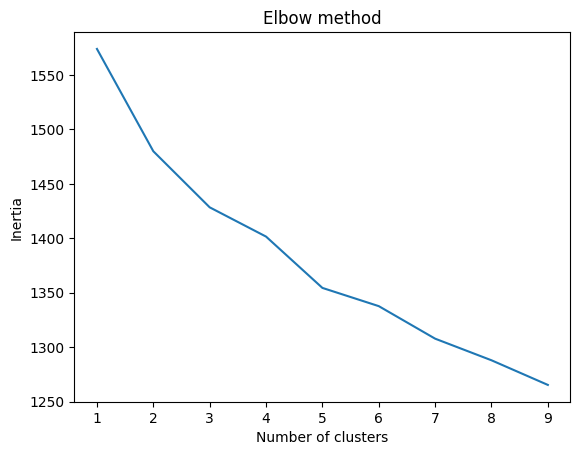

In [23]:
interias = []

for n_clusters in range(1, 10):
    _, kmeans = clasterize('kmeans', embeddings, n_clusters=n_clusters)
    interias.append(kmeans.inertia_)

# Plot the elbow

import matplotlib.pyplot as plt

plt.plot(range(1, 10), interias)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [25]:
choosed_n_clusters = 5

In [26]:
from collections import Counter

clasters, kmeans = clasterize(
    method_name='kmeans', 
    embeddings=embeddings,
    n_clusters=choosed_n_clusters)

counts = Counter(clasters)

# print 

claster_inds = {claster for claster in clasters}

for claster, count in counts.items():
    print(f'Claster {claster} has {count} comments')


kmeans.inertia_

Claster 4 has 826 comments
Claster 3 has 758 comments
Claster 1 has 382 comments
Claster 0 has 591 comments
Claster 2 has 543 comments


1370.5059768820604

In [27]:
# sample comments from claster

for ind in claster_inds:
    print(f'Claster {ind}')
    inds = clasters == ind
    comments_claster = [comment for comment, ind in zip(comments, inds) if ind]
    embeddings_claster = embeddings[inds]

    samples = sample(embeddings_claster, comments_claster, n_samples=5)

    for comment in samples:
        print(comment)
        print('-' * 10)
        pass

    print("=" * 100)

Claster 0
Кто из 2019
----------
Кто с 2019?
----------
Кто из 2018?
----------
2019?
----------
2019 КТО здесь ?)
----------
Claster 1
+
----------
Ре
----------
Я
----------
Я
----------
Я
----------
Claster 2
Прошло 14 лет 😱😨😓😓😓😓😓
----------
2008. Так давно. Как будто только вчера смотрел первый раз.
----------
Бл вот уже 2018 а я пересматриваю....
----------
Это было в 2008... Когда мне было 5 лет... Сейчас я это смотрю и понимаю это было так давно?
----------
10 лет уже через несколько часов 2019 а прикол все ещё смешной)
----------
Claster 3
Хуй святой=)
----------
аххахахахаха
----------
Блядь ору нахуй!🤣🤣🤣🤣🤣!!!!
----------
Ахаахахахах
----------
бляуууууууууууууу
----------
Claster 4
Подпеваем кто помнит : Вот и помер дед Максим,
----------
Блять про меня песню сочинили спасибо)
----------
Как же это ахуенно, просто..... Бля, это шедевр! И голос и игра на гитаре - всё ахуенно!!!
----------
Душевная песня у меня слеза пошла)))
----------
Уже 2К19 !!!!!это песня останется на вечн

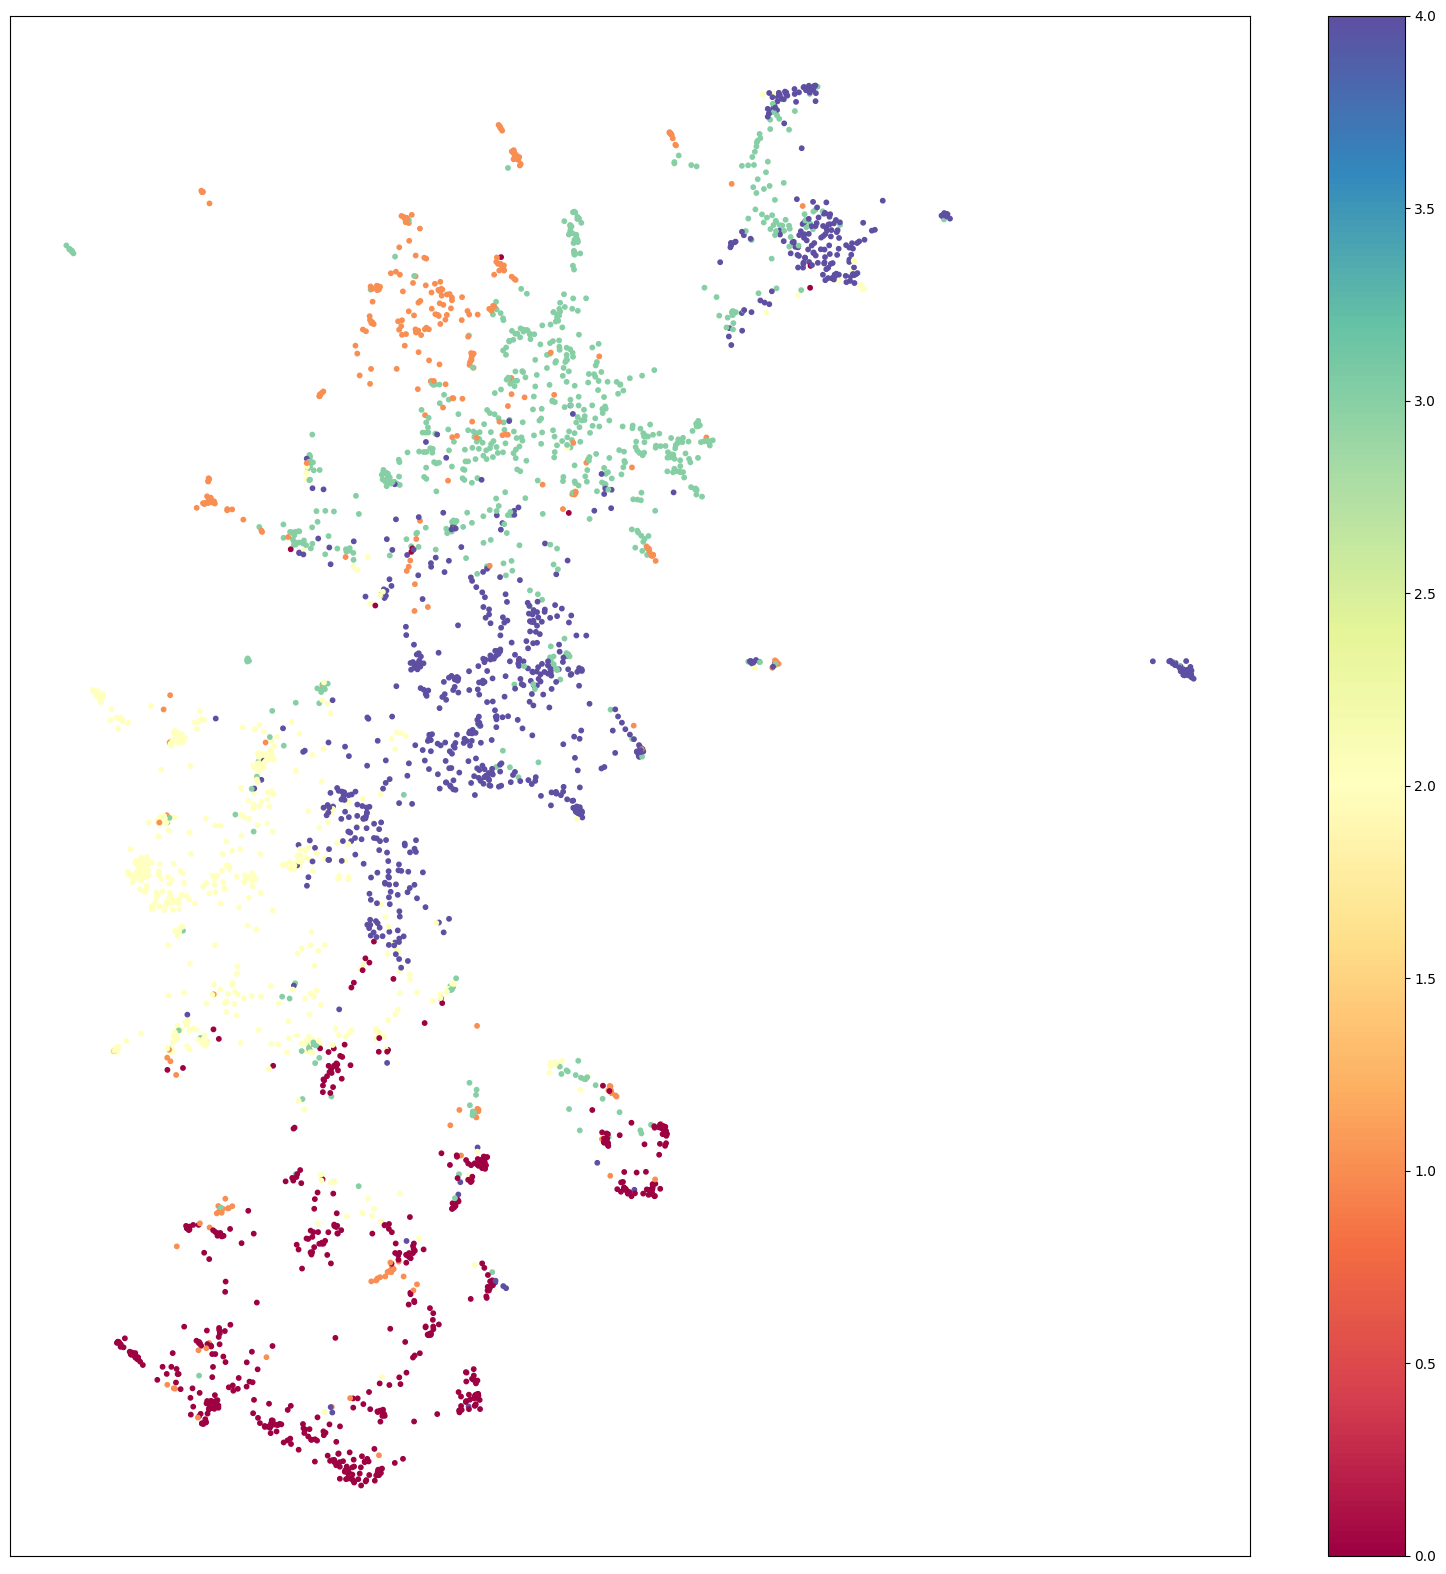

In [28]:
# UMAP visualization
import umap

umap_embeddings = umap.UMAP(n_neighbors=15, n_components=2).fit_transform(embeddings[:])

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
plt.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1], c=clasters[:], s=10, cmap='Spectral')
plt.xticks([])
plt.yticks([])
plt.colorbar()
plt.show()